![deep_book](images/deep_book.PNG)
Online Book : http://neuralnetworksanddeeplearning.com/chap1.html

In [46]:
### 라이브러리 불러오기

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

In [47]:
### mnist 데이터 불러오기

mnist = input_data.read_data_sets('./data/', one_hot = True)
training_img = mnist.train.images
training_lab = mnist.train.labels
test_img = mnist.test.images
test_lab = mnist.test.labels

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


트레이닝 이미지의 타입은 <class 'numpy.ndarray'> 
차원은 (55000, 784)
선택한 이미지의 라벨은 3


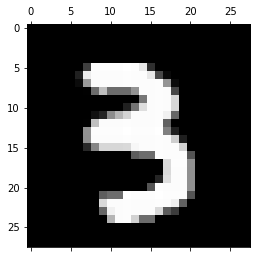

In [48]:
### mnist 데이터 살펴보기

#데이터 타입과 차원 확인
print ("트레이닝 이미지의 타입은 {}".format(type(training_img)),"\n차원은 {}".format(np.shape(training_img)))


# 임의의 데이터 선택
r = np.random.choice(len(training_img), size=1)
sample_img = training_img[r]


# 784차원의 벡터를 그림으로 그리기 위해 28*28로 사이즈 변경
sample_img = np.reshape(sample_img, (28, 28))


plt.matshow(sample_img, cmap=plt.get_cmap('gray'))
sample_lab = training_lab[r]
print ("선택한 이미지의 라벨은 {}".format(np.argmax(sample_lab)))

# 이미지 데이터
![three](images/three.png)

In [ ]:
sample_img

# 네트워크
![network](images/network.PNG)

In [51]:
### 변수 설정 및 네트워크 구성

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

z = tf.matmul(x, W) + b
a = tf.nn.softmax(z)

cross_entropy = - tf.reduce_sum(y * tf.log(a), reduction_indices=1)
cost = tf.reduce_mean(cross_entropy)

In [52]:
### 정확도 측정

correct_prediction = tf.equal(tf.argmax(a,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [53]:
### optimizer와 learning rate 설정

optimization = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [62]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 50

for epoch in range(training_epochs):
    sess.run(optimization, feed_dict={x: training_img, y: training_lab})

#     batch_size = 100
#     total_batch = int(mnist.train.num_examples/batch_size)
   
#     for iteration in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#         sess.run(optimization, feed_dict={x: batch_xs, y: batch_ys})


print(sess.run(accuracy, feed_dict={x: training_img, y: training_lab}))

0.632782


In [63]:
print(sess.run(accuracy, feed_dict={x: test_img, y: test_lab}))

0.6485
